In [2]:
import numpy as np
from util import *
from decentralized import plot_solve
import matplotlib.pyplot as plt
import os
import util

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from decentralized import random_setup,pos_mask


In [20]:
x0_try,xf_try = random_setup(4,6,energy=10,n_d=3)


In [21]:
x0_try.T

array([[-1.235,  0.594, -0.634,  0.   ,  0.   ,  0.   ,  0.355, -0.761,
        -2.714,  0.   ,  0.   ,  0.   ,  1.291, -0.736,  4.127,  0.   ,
         0.   ,  0.   , -0.411,  0.903, -0.779,  0.   ,  0.   ,  0.   ]])

In [4]:
n_agents = 10
n_states = 6
x_dims = [n_states]*n_agents

In [42]:
data = np.load('10_drones_distributed_sim_data.npy')

In [43]:
x0,xf = util.paper_setup_10_quads()

In [44]:
plot_solve?

Signature: plot_solve(X, J, x_goal, x_dims=None, color_agents=False, n_d=2)
Docstring: Plot the resultant trajectory on plt.gcf()
File:      /mnt/c/Users/Randy666/Documents/projects/ICON_lab/decentralized/decentralized/util.py
Type:      function


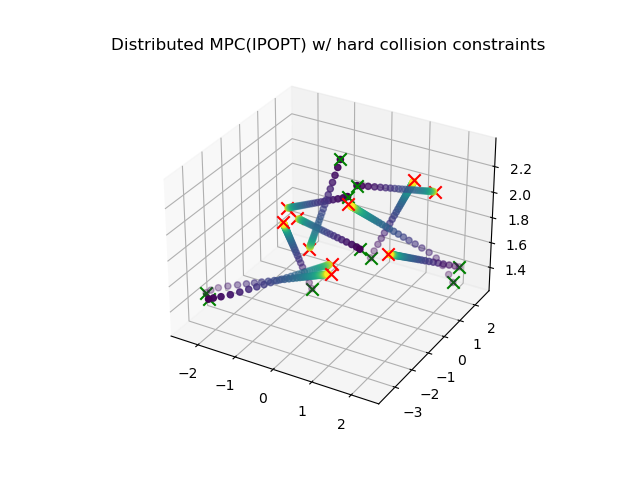

In [45]:
%matplotlib ipympl
plt.figure(dpi=100)
plot_solve(data,56.80,xf,x_dims=[6,6,6,6,6,6,6,6,6,6],n_d=3)
plt.title('Distributed MPC(IPOPT) w/ hard collision constraints');

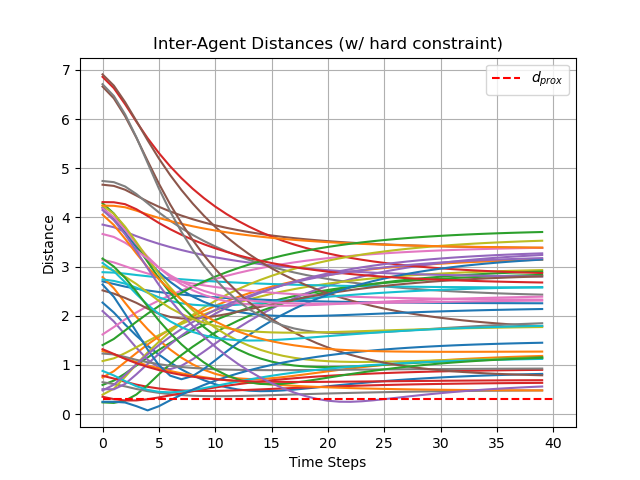

In [46]:
plt.figure()
plt.plot(compute_pairwise_distance(data,x_dims));
plt.hlines(0.3, 0, data.shape[0], 'r', ls='--', label="$d_{prox}$")
plt.title("Inter-Agent Distances (w/ hard constraint)")
plt.xlabel("Time Steps")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.draw()

### Distributed MPC with collision costs instead of constraints:

In [47]:
data_soft = np.load('10_drones_distributed_sim_data(soft_constraint).npy')

In [48]:
n_agents = 10
n_states = 6
x_dims = [n_states]*n_agents


In [49]:
data_soft.shape

(31, 60)

In [50]:
x0,xf = paper_setup_10_quads()

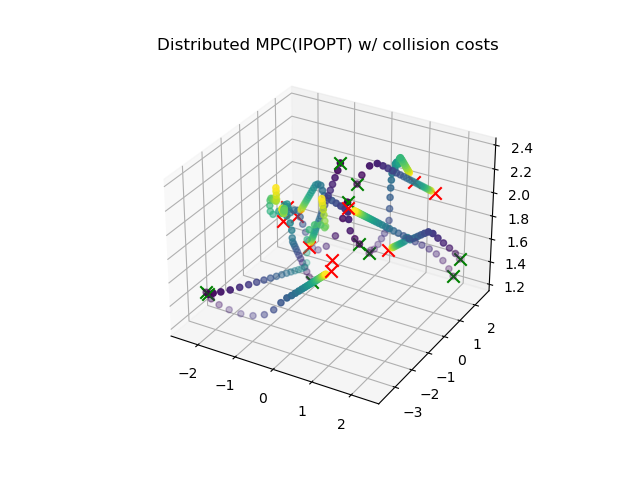

In [51]:
%matplotlib ipympl
plt.figure(dpi=100)
plot_solve(data_soft,2606.853,xf,x_dims=[6,6,6,6,6,6,6,6,6,6],n_d=3);
plt.title('Distributed MPC(IPOPT) w/ collision costs');

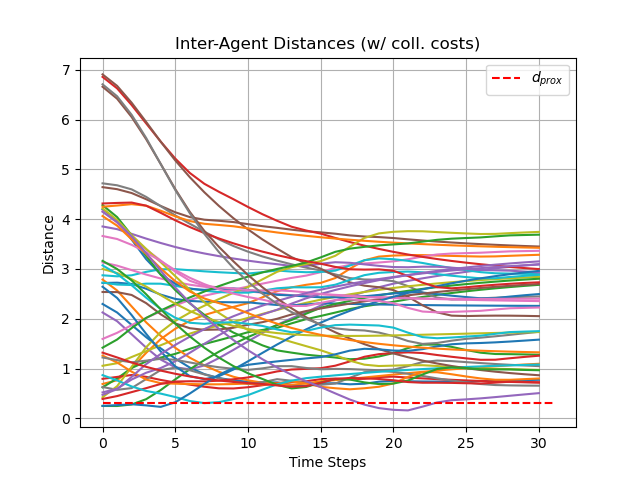

In [52]:
plt.figure()
plt.plot(compute_pairwise_distance(data_soft,x_dims));
plt.hlines(0.3, 0, data_soft.shape[0], 'r', ls='--', label="$d_{prox}$")
plt.title("Inter-Agent Distances (w/ coll. costs)")
plt.xlabel("Time Steps")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.draw()

## 15 Drones

In [40]:
x0,xf = util.paper_setup_15_quads()

In [41]:
util.compute_pairwise_distance(x0,x_dims)

array([[0.751, 2.184, 1.295, 0.805, 1.351, 1.929, 2.063, 1.697, 0.89 ,
        0.935, 2.132, 0.837, 0.904, 1.302, 2.248, 1.316, 1.306, 1.8  ,
        1.922, 2.517, 1.966, 1.081, 1.392, 2.658, 1.219, 0.95 , 1.565,
        0.994, 1.783, 1.217, 0.387, 2.023, 0.719, 1.825, 1.403, 1.79 ,
        1.48 , 1.835, 0.982, 1.209, 0.967, 0.669, 1.725, 0.874, 1.228,
        0.783, 1.739, 0.671, 0.868, 0.468, 0.823, 1.652, 2.057, 1.162,
        0.51 , 0.634, 1.852, 0.848, 1.356, 1.054, 1.189, 1.49 , 0.532,
        1.178, 0.445, 1.157, 0.738, 1.399, 0.553, 1.951, 0.784, 1.652,
        1.248, 1.838, 1.252, 1.507, 0.807, 1.738, 2.449, 1.487, 0.716,
        1.41 , 1.643, 1.403, 1.34 , 0.826, 1.393, 1.032, 1.592, 0.596,
        0.969, 2.285, 1.095, 1.432, 1.257, 1.357, 0.334, 0.998, 0.489,
        1.445, 1.923, 1.304, 0.672, 0.514, 1.018]])

In [23]:
x0.T

array([[-0.743, -0.042,  0.557,  0.   ,  0.   ,  0.   , -0.614,  0.015,
         0.6  ,  0.   ,  0.   ,  0.   ,  0.54 , -1.023,  1.222,  0.   ,
         0.   ,  0.   ,  1.158,  0.392,  1.442,  0.   ,  0.   ,  0.   ,
         0.561, -1.19 ,  1.274,  0.   ,  0.   ,  0.   ,  0.211,  0.012,
         0.513,  0.   ,  0.   ,  0.   , -0.007,  0.605,  1.334,  0.   ,
         0.   ,  0.   ,  0.028,  0.515,  1.805,  0.   ,  0.   ,  0.   ,
        -0.583,  0.313,  1.872,  0.   ,  0.   ,  0.   , -0.029,  0.175,
         0.705,  0.   ,  0.   ,  0.   ,  1.088,  0.522,  1.938,  0.   ,
         0.   ,  0.   , -0.595,  0.43 ,  1.545,  0.   ,  0.   ,  0.   ,
         0.046, -0.335,  2.186,  0.   ,  0.   ,  0.   , -0.689, -0.172,
         0.594,  0.   ,  0.   ,  0.   , -0.371, -0.217,  1.276,  0.   ,
         0.   ,  0.   ]])

In [24]:
xf.T

array([[-0.452, -0.312,  1.21 ,  0.   ,  0.   ,  0.   , -0.457,  0.27 ,
         1.283,  0.   ,  0.   ,  0.   ,  0.172,  0.413,  1.353,  0.   ,
         0.   ,  0.   , -0.76 , -0.76 ,  0.948,  0.   ,  0.   ,  0.   ,
        -0.57 ,  0.659,  1.353,  0.   ,  0.   ,  0.   , -0.042,  0.815,
         0.598,  0.   ,  0.   ,  0.   , -0.669, -0.893,  1.235,  0.   ,
         0.   ,  0.   ,  1.684, -0.723,  1.151,  0.   ,  0.   ,  0.   ,
        -0.191, -0.24 ,  1.122,  0.   ,  0.   ,  0.   , -0.437,  0.394,
         1.181,  0.   ,  0.   ,  0.   ,  0.128, -0.134,  1.338,  0.   ,
         0.   ,  0.   ,  1.501, -0.764,  0.859,  0.   ,  0.   ,  0.   ,
         0.169,  0.733,  0.636,  0.   ,  0.   ,  0.   , -0.595,  0.51 ,
         1.229,  0.   ,  0.   ,  0.   ,  0.521,  0.033,  1.547,  0.   ,
         0.   ,  0.   ]])

In [25]:
x_dims = [6]*15


In [26]:
util.compute_pairwise_distance(x0,x_dims)

array([[0.147, 1.746, 2.141, 1.879, 0.956, 1.25 , 1.569, 1.371, 0.76 ,
        2.361, 1.105, 1.833, 0.145, 0.828, 1.672, 1.998, 1.813, 0.83 ,
        1.12 , 1.454, 1.307, 0.616, 2.223, 1.032, 1.753, 0.201, 0.755,
        1.56 , 0.177, 1.296, 1.72 , 1.722, 1.862, 1.423, 1.788, 1.872,
        1.283, 1.621, 1.216, 1.7  , 1.381, 1.19 , 1.193, 1.795, 1.414,
        0.517, 1.757, 1.523, 2.11 , 1.654, 1.465, 1.884, 1.864, 1.982,
        1.592, 1.91 , 2.009, 1.353, 1.75 , 1.347, 1.036, 1.398, 1.602,
        0.348, 1.749, 1.375, 1.717, 0.922, 0.986, 0.48 , 0.84 , 0.762,
        1.253, 0.649, 1.269, 1.271, 0.901, 0.647, 1.152, 1.068, 0.681,
        0.932, 1.566, 0.988, 1.299, 1.685, 0.348, 0.956, 1.371, 0.826,
        1.699, 1.045, 1.568, 0.754, 0.772, 1.731, 1.372, 2.333, 1.764,
        1.187, 1.129, 0.737, 1.761, 1.008, 0.754]])